### Predicting HDB Prices - XGBoost



In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor


#### Load data

In [8]:
df = pd.read_csv('../data/train-test/training_data.csv')

In [11]:
df.head()

,storey_range,resale_price,poi_vector,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,town_CENTRAL AREA,...,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2,floor_area_sqm,remaining_lease,sora,bto_supply_within_4km,distance2cbd
0,2,12.449019,[-3.3962243e+00 -4.0309663e+00 3.7387407e+00 ...,0,0,0,0,0,0,0,...,0,0,0,0,0,-1.548031,-0.347419,-0.787221,-0.830497,-0.521884
1,0,12.524526,[-3.4233415 -4.574654 3.5261717 -0.558677...,0,0,0,0,0,0,0,...,0,0,0,0,0,-1.215427,-0.731009,-0.787221,-0.164072,-0.578866
2,0,12.560244,[-3.3962243e+00 -4.0309663e+00 3.7387407e+00 ...,0,0,0,0,0,0,0,...,0,0,0,0,0,-1.173851,-0.807728,-0.787221,-0.896320,-0.562823
3,0,12.577636,[-3.2633016e+00 -4.6608467e+00 3.5853505e+00 ...,0,0,0,0,0,0,0,...,0,0,0,0,0,-1.215427,-0.884446,-0.787221,-0.292398,-0.735271
4,2,12.577636,[-3.4233415 -4.574654 3.5261717 -0.558677...,0,0,0,0,0,0,0,...,0,0,0,0,0,-1.215427,-0.807728,-0.787221,-0.039945,-0.633879


#### Creating a Pipeline 

In [30]:
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns


In [31]:
cat_transformer = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=True)

preprocessing = make_column_transformer(
    (cat_transformer, cat_cols),
    remainder='passthrough'
)

preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 Index(['poi_vector'], dtype='object'))])

#### Train Test Split the Data 

In [32]:
y_values = df['resale_price']
X_values = df.drop('resale_price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_values, y_values, test_size=0.2, random_state=42)
print(len(X_train), len(X_test))
print(len(y_train), len(y_test))
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

165052 41263
165052 41263
(165052, 47) (41263, 47)
(165052,) (41263,)


In [33]:
pipe = make_pipeline(preprocessing, XGBRegressor())

pipe


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index(['poi_vector'], dtype='object'))])),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

#### Train and Fit Baseline XGBoost Model

In [34]:
pipe.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index(['poi_vector'], dtype='object'))])),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [35]:
pipe.steps[1][1]

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [36]:
# R2 score for training
r2_baseline_train = pipe.score(X_train, y_train)

# MAE for training
y_pred = pipe.predict(X_train)
mae_baseline_train = mean_absolute_error(y_train, y_pred)

print("Training r2 score =", round(r2_baseline_train, 4))
print("Training MAE score =", round(mae_baseline_train, 2))


Training r2 score = 0.9459
Training MAE score = 0.06


In [37]:
# R2 score for testing
r2_baseline_test = pipe.score(X_test, y_test)

# MAE for testing
y_pred = pipe.predict(X_test)
mae_baseline_test = mean_absolute_error(y_test, y_pred)

print("Test r2 score =", round(r2_baseline_test, 4))
print("Test MAE score =", round(mae_baseline_test, 2))


/Users/joesurf/Documents/NUS/BZA/Y3S2/BT4222/Housing-Price-Time-Series-Forecasting/env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Test r2 score = 0.9422
Test MAE score = 0.06


/Users/joesurf/Documents/NUS/BZA/Y3S2/BT4222/Housing-Price-Time-Series-Forecasting/env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


#### Improving on the Baseline Score with Hyperparameter Tuning 

In [38]:
X_train_processed = preprocessing.fit_transform(X_train)
X_test_processed = preprocessing.transform(X_test)


/Users/joesurf/Documents/NUS/BZA/Y3S2/BT4222/Housing-Price-Time-Series-Forecasting/env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [40]:
xgb_reg = XGBRegressor()

param_grid = {
    'n_estimators': [75, 100, 125],
    'learning_rate': [0.4, 0.3, 0.2],
    'max_depth': [5, 6, 7],
    'min_child_weight': [0.5, 1, 2],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.75, 1]
}

grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train_processed, y_train)

print(grid_search.best_params_)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


[CV] END gamma=0, learning_rate=0.4, max_depth=5, min_child_weight=0.5, n_estimators=75, subsample=0.75; total time=   2.3s
[CV] END gamma=0, learning_rate=0.4, max_depth=5, min_child_weight=0.5, n_estimators=75, subsample=0.75; total time=   2.3s
[CV] END gamma=0, learning_rate=0.4, max_depth=5, min_child_weight=0.5, n_estimators=75, subsample=1; total time=   2.4s
[CV] END gamma=0, learning_rate=0.4, max_depth=5, min_child_weight=0.5, n_estimators=75, subsample=1; total time=   2.4s
[CV] END gamma=0, learning_rate=0.4, max_depth=5, min_child_weight=0.5, n_estimators=75, subsample=1; total time=   2.4s
[CV] END gamma=0, learning_rate=0.4, max_depth=5, min_child_weight=0.5, n_estimators=75, subsample=0.75; total time=   2.4s
[CV] END gamma=0, learning_rate=0.4, max_depth=5, min_child_weight=0.5, n_estimators=75, subsample=0.75; total time=   2.4s
[CV] END gamma=0, learning_rate=0.4, max_depth=5, min_child_weight=0.5, n_estimators=75, subsample=0.75; total time=   2.4s
[CV] END gamma=0,

In [41]:
grid_search.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.4, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=0.5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=125, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [42]:
# MAE for training
y_pred = grid_search.best_estimator_.predict(X_train_processed)
mae_baseline_train = mean_absolute_error(y_train, y_pred)

print("Training MAE score =", round(mae_baseline_train, 2))

Training MAE score = 0.05


In [43]:
# R2 score for testing
r2_baseline_test = grid_search.best_estimator_.score(X_test_processed, y_test)

# MAE for testing
y_pred = grid_search.best_estimator_.predict(X_test_processed)
mae_baseline_test = mean_absolute_error(y_test, y_pred)

print("Test r2 score =", round(r2_baseline_test, 4))
print("Test MAE score =", round(mae_baseline_test, 2))

Test r2 score = 0.9525
Test MAE score = 0.05


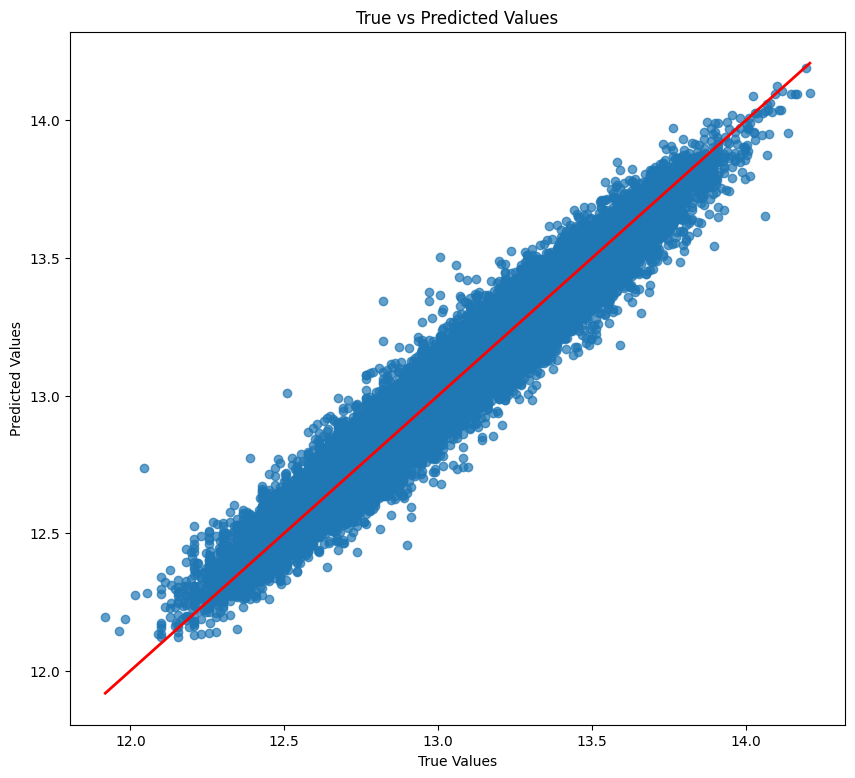

In [44]:
plt.figure(figsize=(10, 9))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()

**Evaluation**
- There is a noticeable pattern where the predicted values tend to be higher than the true values below 13.0, similar around the 13.0 to 13.5 range, and lower than the true values after the 13.5 amount. 
- This suggests a potential overestimation by the model for lower values and an underestimation for higher values.




